In [27]:
# import all necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

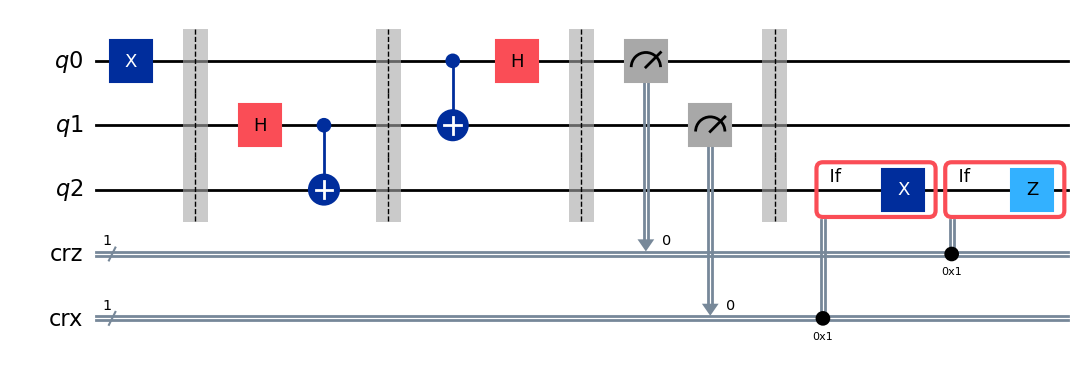

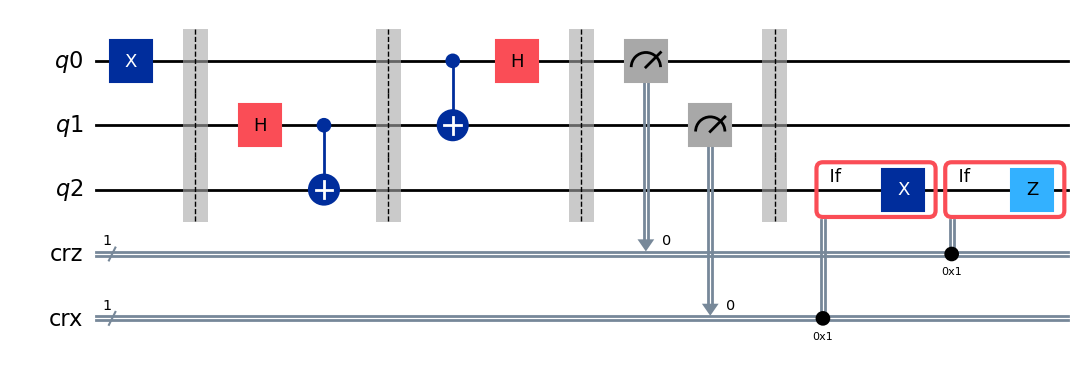

In [28]:
# initialize 3-qubit circuit with named registers
q0 = QuantumRegister(1, name="q0")
q1 = QuantumRegister(1, name="q1") 
q2 = QuantumRegister(1, name="q2")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
circuit = QuantumCircuit(q0, q1, q2, crz, crx)

# initialize Olivia's qubit (quantum state to teleport)
circuit.x(q0)
circuit.barrier()

# create Bell state pair
circuit.h(q1)
circuit.cx(q1, q2)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(q0, q1)
circuit.h(q0)
circuit.barrier()

circuit.measure(q0, crz)
circuit.measure(q1, crx)
circuit.barrier()

# Barron transforms his qubit based on measurement results
with circuit.if_test((crx, 1)):
    circuit.x(q2)

with circuit.if_test((crz, 1)):
    circuit.z(q2)

circuit.draw(output='mpl')

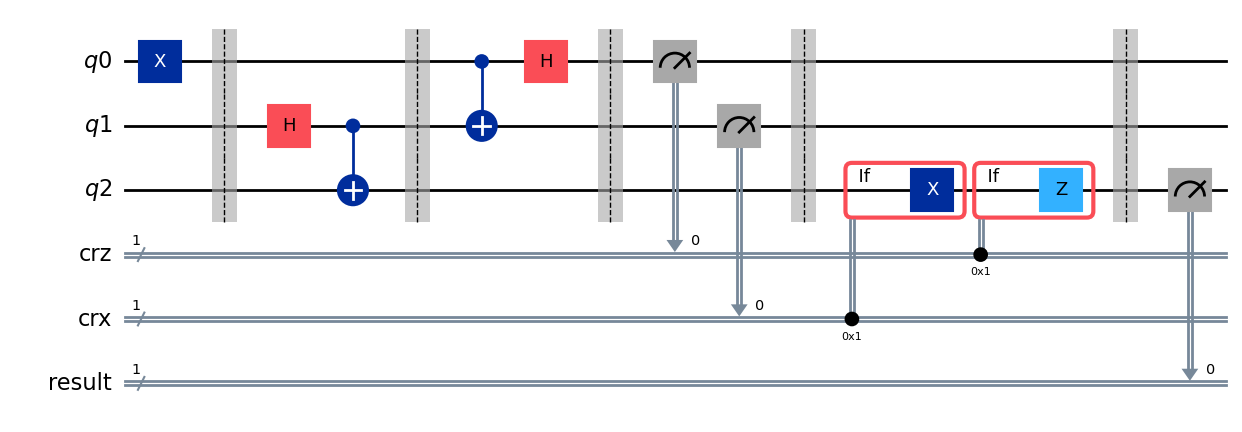

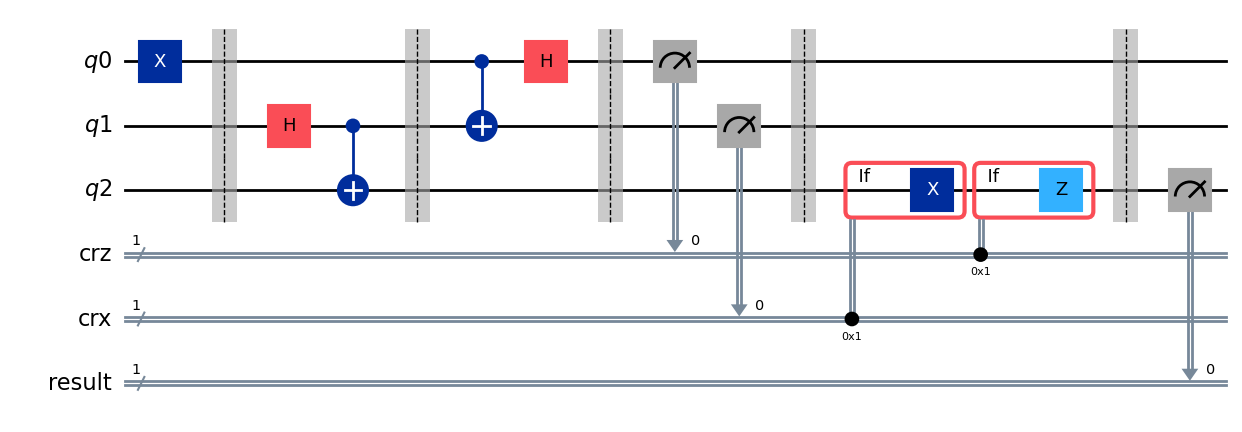

In [29]:
# add final measurement of Barron's qubit
cr_result = ClassicalRegister(1, name="result")
circuit.barrier()
circuit.add_register(cr_result)
circuit.measure(2, 2)
circuit.draw(output='mpl')

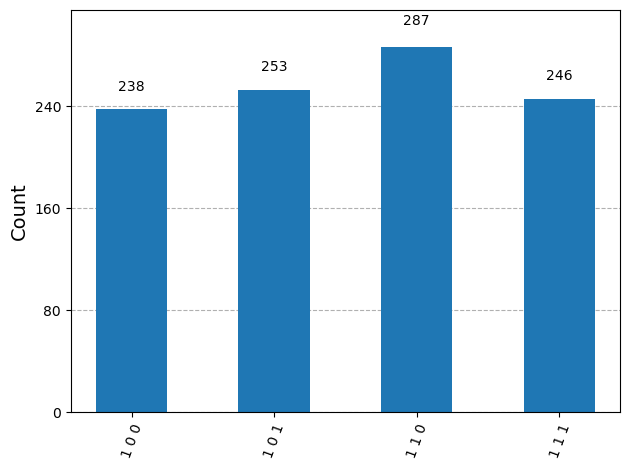

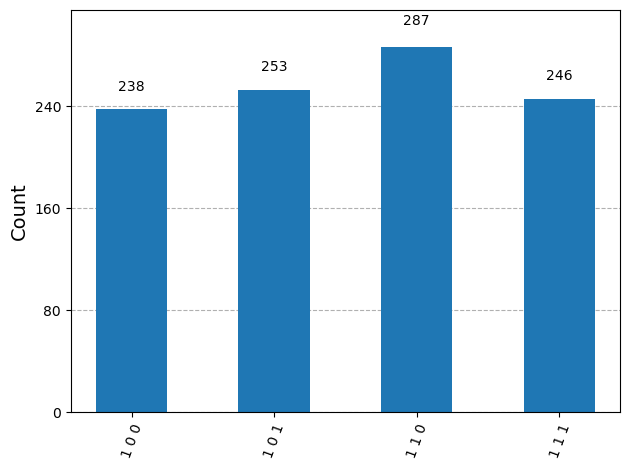

In [31]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts())

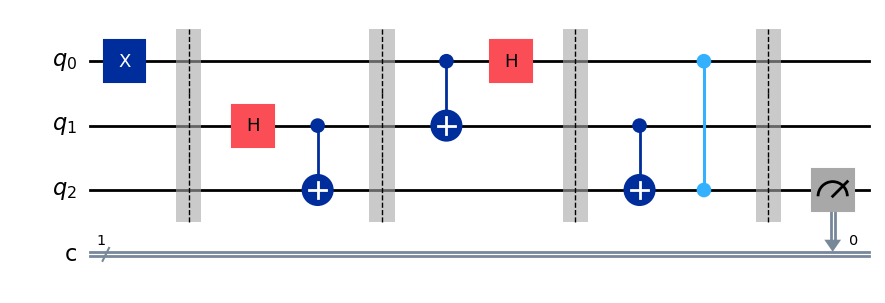

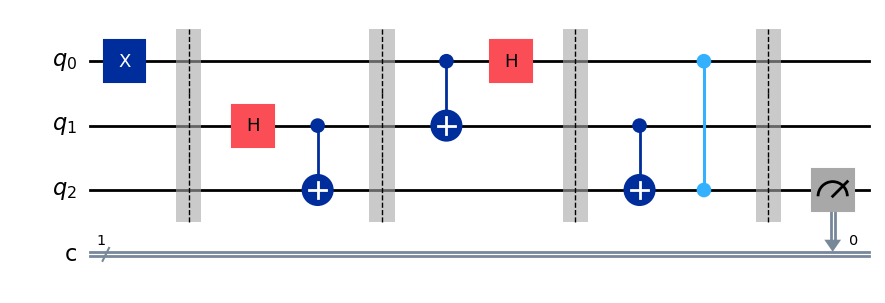

In [32]:
# quantum teleportation circuit using deferred measurement
circuit_def = QuantumCircuit(3, 1)

# initialize Olivia's qubit (quantum state to teleport)
circuit_def.x(0)
circuit_def.barrier()

# create Bell state pair
circuit_def.h(1)
circuit_def.cx(1, 2)
circuit_def.barrier()

# Olivia performs Bell state measurement
circuit_def.cx(0, 1)
circuit_def.h(0)
circuit_def.barrier()

# apply conditional operations on Barron's qubit
circuit_def.cx(1, 2)
circuit_def.cz(0, 2)
circuit_def.barrier()

# measure Barron's destination qubit
circuit_def.measure(2, 0)

circuit_def.draw(output='mpl')

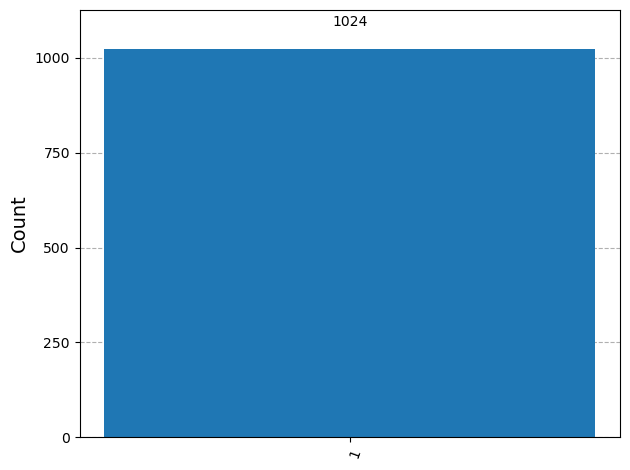

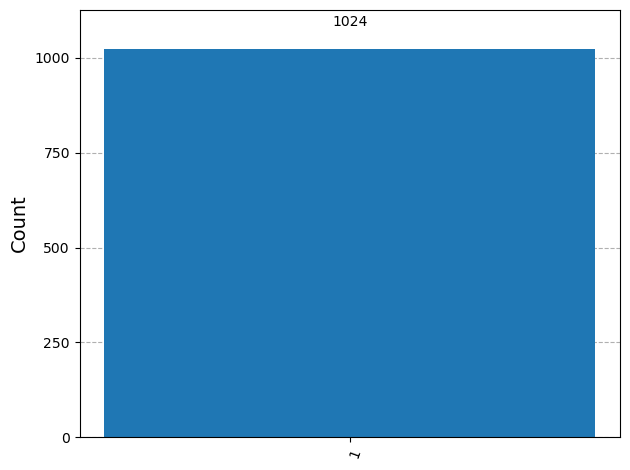

In [33]:
simulator = AerSimulator()
compiled_circuit_def = transpile(circuit_def, simulator)
result_def = simulator.run(compiled_circuit_def).result()
plot_histogram(result_def.get_counts())